In [16]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
# import earthpy as et

# Plot census blocks w/ nursing homes

using this GIS tutorial: https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/

downloaded shapefiles from: https://www.census.gov/cgi-bin/geo/shapefiles/index.php

some helpful var encodings here: https://www2.census.gov/geo/pdfs/maps-data/data/tiger/tgrshp2019/TGRSHP2019_TechDoc_Ch5.pdf

FIPS encodings: https://www.census.gov/library/reference/code-lists/ansi.html

In [10]:
#read in shapefile. these are block level, washington
wa_block_shp = gpd.read_file('/home/j/temp/beatrixh/sim_science/tl_2019_53_tabblock10/tl_2019_53_tabblock10.shp')

In [38]:
# edges = "all lines"
king_edges = gpd.read_file('/home/j/temp/beatrixh/sim_science/tl_2019_53033_edges/tl_2019_53033_edges.shp')

In [60]:
# faces = polygons.
king_faces = gpd.read_file('/home/j/temp/beatrixh/sim_science/tl_2019_53033_faces/tl_2019_53033_faces.shp')

In [11]:
#checkout what you pulled in
wa_block_shp.head(6)

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,53,039,950100,4013,530399501004013,Block 4013,G5040,U,33787,C,S,209109,0,+45.8307785,-120.8258791,"POLYGON ((-120.82835 45.83033, -120.82833 45.8..."
1,53,071,920000,2021,530719200002021,Block 2021,G5040,R,None,None,S,2231773,0,+46.1340510,-118.8067045,"POLYGON ((-118.82630 46.13865, -118.82623 46.1..."
2,53,041,971600,2038,530419716002038,Block 2038,G5040,R,None,None,S,1949325,0,+46.4328559,-123.0201889,"POLYGON ((-123.03561 46.43108, -123.03532 46.4..."
3,53,041,971900,1045,530419719001045,Block 1045,G5040,R,None,None,S,282958,0,+46.5130699,-122.1622816,"POLYGON ((-122.18014 46.50329, -122.18010 46.5..."
4,53,041,971900,1019,530419719001019,Block 1019,G5040,R,None,None,S,71527,0,+46.5148965,-122.1671403,"POLYGON ((-122.17133 46.51428, -122.17047 46.5..."
5,53,041,972000,1012,530419720001012,Block 1012,G5040,R,None,None,S,143311,0,+46.5398573,-122.0420961,"POLYGON ((-122.04711 46.54297, -122.04665 46.5..."


In [12]:
#see metadata
type(wa_block_shp)

geopandas.geodataframe.GeoDataFrame

In [13]:
# view the spatial extent
# note -- The spatial extent of a shapefile or geopandas GeoDataFrame 
# represents the geographic "edge" or location that is the furthest north,
# south east and west. Thus is represents the overall geographic coverage 
# of the spatial object. 
wa_block_shp.total_bounds

array([-124.848974,   45.543541, -116.916071,   49.002436])

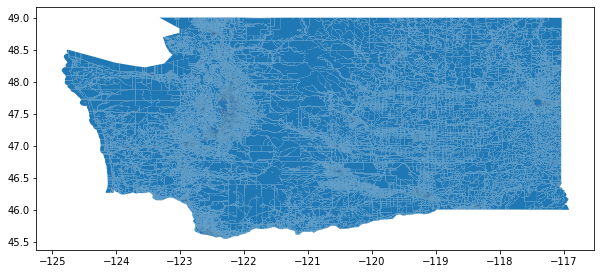

In [17]:
fig, ax = plt.subplots(figsize = (10,10))
wa_block_shp.plot(ax=ax)
plt.show()

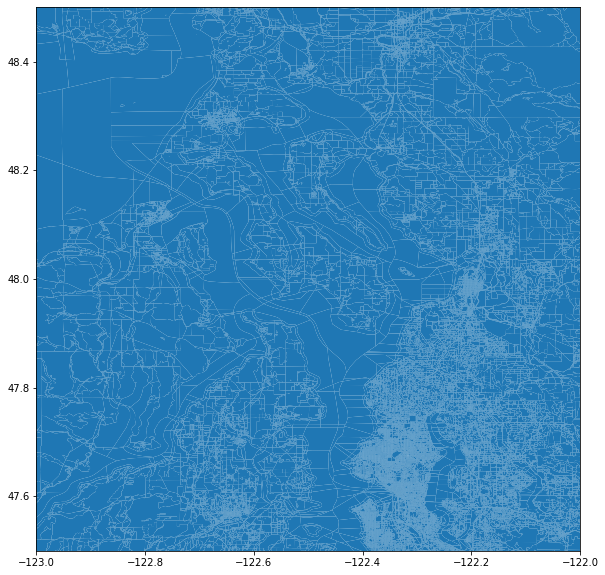

In [20]:
#how to zoom in?
fig, ax = plt.subplots(figsize = (10,10))
ax.set_xlim(-123, -122)
ax.set_ylim(47.5, 48.5)

wa_block_shp.plot(ax=ax)

plt.show()

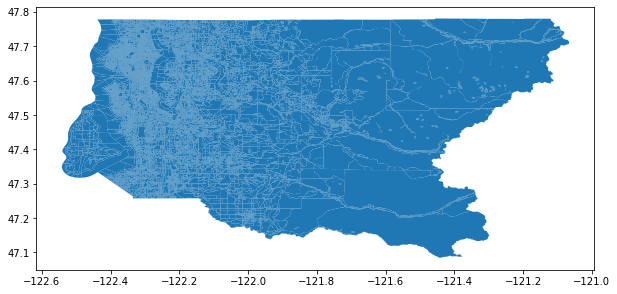

In [29]:
#this should be king county
king_shp = wa_block_shp[wa_block_shp.COUNTYFP10=='033']

fig, ax = plt.subplots(figsize = (10,10))
king_shp.plot(ax=ax)
plt.show()

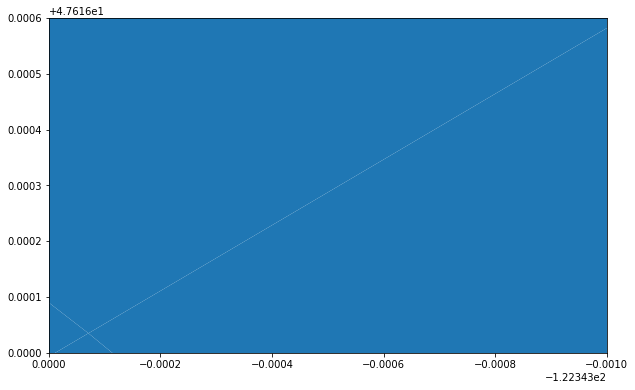

In [48]:
#where is ihme?
fig, ax = plt.subplots(figsize = (10,10))
ax.set_xlim(-122.3430, -122.3440)
ax.set_ylim(47.6160, 47.6166)

king_shp.plot(ax=ax)

plt.show()

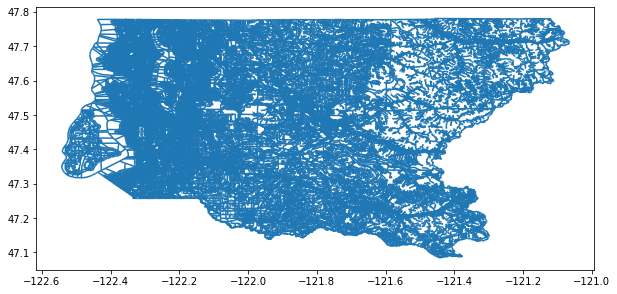

In [39]:
#this is supposed to contain "all lines"
fig, ax = plt.subplots(figsize = (10,10))

king_edges.plot(ax=ax)

plt.show()

In [53]:
# are these actual zipcodes?
king_edges[['ZIPL','ZIPR']]

,ZIPL,ZIPR
0,None,None
1,None,None
2,None,None
3,98092,98092
4,None,None
...,...,...
207510,None,None
207511,None,None
207512,None,None
207513,None,None


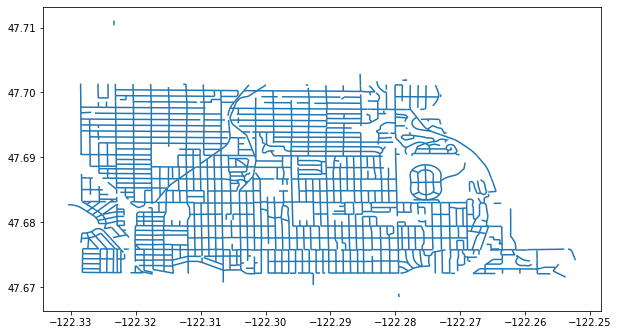

In [58]:
#find my house?
fig, ax = plt.subplots(figsize = (10,10))

king_edges[king_edges.ZIPR=='98115'].plot(ax=ax)

plt.show()

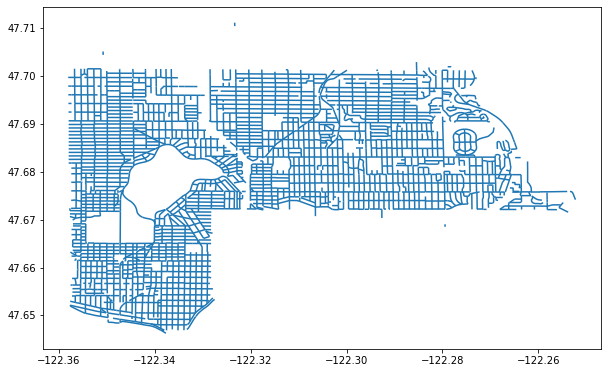

In [59]:
#and greenlake!
fig, ax = plt.subplots(figsize = (10,10))

king_edges[(king_edges.ZIPR=='98115')|(king_edges.ZIPR=='98103')].plot(ax=ax)

plt.show()

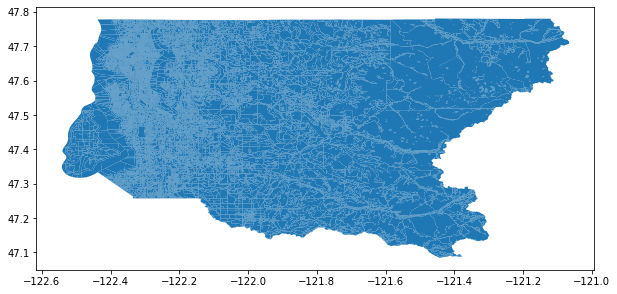

In [61]:
#checkout "faces"
fig, ax = plt.subplots(figsize = (10,10))

king_faces.plot(ax=ax)

plt.show()

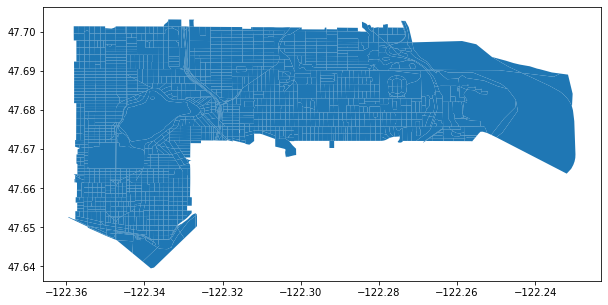

In [79]:
#zoom in
fig, ax = plt.subplots(figsize = (10,10))

king_faces[(king_faces.ZCTA5CE10=='98115')|(king_faces.ZCTA5CE10=='98103')].plot(ax=ax)


plt.show()

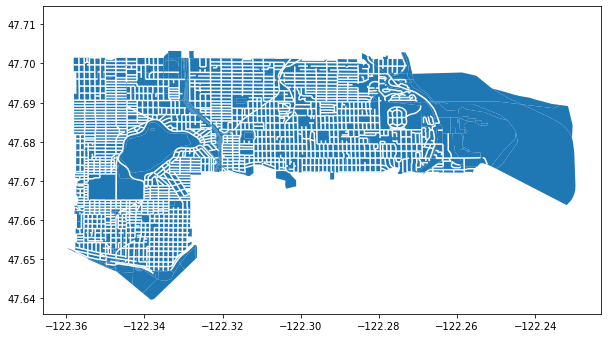

In [88]:
#add layers
fig, ax = plt.subplots(figsize = (10,10))

king_faces[(king_faces.ZCTA5CE10=='98115')|(king_faces.ZCTA5CE10=='98103')].plot(ax=ax)
king_edges[(king_edges.ZIPR=='98115')|(king_edges.ZIPR=='98103')].plot(ax=ax,
                                                                      color='white')
plt.show()

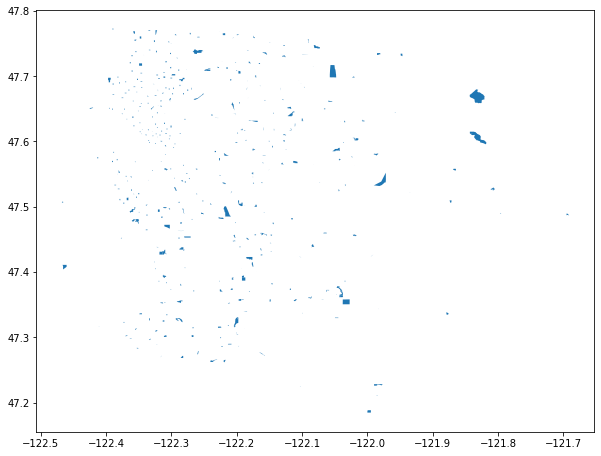

In [74]:
#todo: figure out if you can do by block, and then try and layer nursing homes in.